### Project 01: Vacuum Cleaner with a fuzzy control system
**Pablo Olivares Martínez**

First of all, we need to import the necessary libraries:

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Next, we need to define the input and output variables in the universe given:

In [2]:
speed = ctrl.Antecedent(np.linspace(0, 2.5, 3), 'speed')
diaphragm = ctrl.Antecedent(np.linspace(0, 40, 4), 'diaphragm')
voltage = ctrl.Consequent(np.linspace(110, 230, 5), 'voltage')

Now, we need to define the membership functions for the input and output variables:

In [3]:
# Here we are just generating automaticly the membership functions
speed.automf(names=['slow', 'normal', 'rapid'])
diaphragm.automf(names=['weak', 'medium', 'strong', 'very strong'])
voltage.automf(names=['very weak', 'medium', 'fairly strong', 'strong', 'very strong'])

Let's visualize the membership functions:

/home/pablo/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


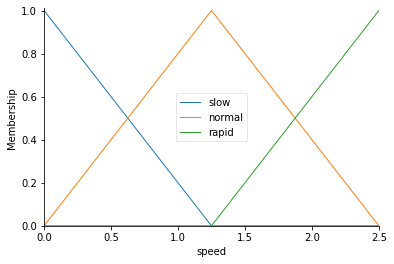

In [4]:
speed.view()

/home/pablo/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


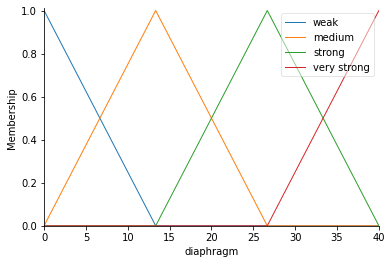

In [5]:
diaphragm.view()

/home/pablo/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


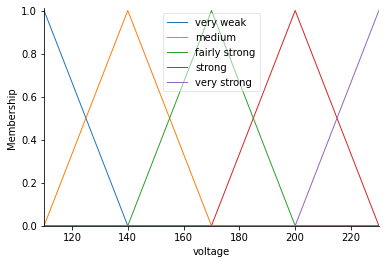

In [6]:
voltage.view()

To continue, we need to define the rules and the control system:

In [7]:
rule1 = ctrl.Rule(speed['slow'] & diaphragm['weak'], voltage['strong'])
rule2 = ctrl.Rule(speed['normal'] & diaphragm['weak'], voltage['very strong'])
rule3 = ctrl.Rule(speed['rapid'] & diaphragm['weak'], voltage['very strong'])
rule4 = ctrl.Rule(speed['slow'] & diaphragm['medium'], voltage['medium'])
rule5 = ctrl.Rule(speed['normal'] & diaphragm['medium'], voltage['fairly strong'])
rule6 = ctrl.Rule(speed['rapid'] & diaphragm['medium'], voltage['very strong'])
rule7 = ctrl.Rule(speed['slow'] & diaphragm['strong'], voltage['very weak'])
rule8 = ctrl.Rule(speed['normal'] & diaphragm['strong'], voltage['medium'])
rule9 = ctrl.Rule(speed['rapid'] & diaphragm['strong'], voltage['very strong'])
rule10 = ctrl.Rule(speed['slow'] & diaphragm['very strong'], voltage['medium'])
rule11 = ctrl.Rule(speed['normal'] & diaphragm['very strong'], voltage['strong'])
rule12 = ctrl.Rule(speed['rapid'] & diaphragm['very strong'], voltage['very strong'])

rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12]

voltage_ctrl = ctrl.ControlSystem(rules)
# This simulator will calculate the output of the system using the input values
suplying = ctrl.ControlSystemSimulation(voltage_ctrl)

Then we can define the input data to try if everything went right and compute the output:

In [8]:
suplying.input['speed'] = 1.2
suplying.input['diaphragm'] = 20
suplying.compute()

Finally, we can visualize the results of the defuzzification:

154.6825396825397


/home/pablo/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


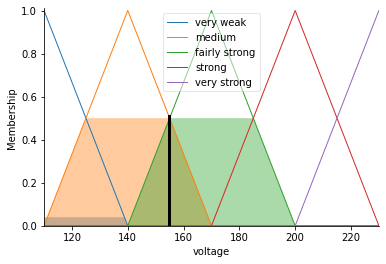

In [9]:
print(suplying.output['voltage'])
voltage.view(sim=suplying)